<a href="https://colab.research.google.com/github/dazzerz/VC-Gamers-Data-Analyst-Test/blob/main/Test_VC_Gamers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reload the uploaded CSV file
df = 'https://raw.githubusercontent.com/dazzerz/VC-Gamers-Data-Analyst-Test/refs/heads/main/transactions_data_dummy.csv'
data = pd.read_csv(df)
data

,Transaction_ID,User_ID,Date,Item_Purchased,Price,Quantity,Total_Spent,Payment_Method,Status
0,TXN00001,USR0064,2024-01-01 00:00:00.000000000,Skin D,50000,3,150000,E-Wallet,Completed
1,TXN00002,USR0003,2024-01-01 04:19:43.166332665,Skin A,100000,3,300000,E-Wallet,Completed
2,TXN00003,USR0028,2024-01-01 08:39:26.332665330,Skin B,150000,3,450000,E-Wallet,Completed
3,TXN00004,USR0023,2024-01-01 12:59:09.498997995,Skin C,100000,1,100000,E-Wallet,Failed
4,TXN00005,USR0074,2024-01-01 17:18:52.665330661,Skin A,50000,2,100000,Credit Card,Completed
...,...,...,...,...,...,...,...,...,...
495,TXN00496,USR0068,2024-03-30 06:41:07.334669338,Skin A,50000,1,50000,Credit Card,Pending
496,TXN00497,USR0041,2024-03-30 11:00:50.501002004,Skin B,50000,1,50000,Bank Transfer,Completed
497,TXN00498,USR0017,2024-03-30 15:20:33.667334669,Skin C,100000,3,300000,E-Wallet,Completed
498,TXN00499,USR0047,2024-03-30 19:40:16.833667334,Skin E,75000,3,225000,E-Wallet,Completed


In [6]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [4]:
# Get the total number of transactions in the dataset
total_transactions = data.shape[0]
total_transactions

500

In [9]:
# Filter only completed transactions
completed_data = data[data['Status'] == 'Completed']

# Group by Item_Purchased and calculate total quantity sold
top_items = (
    completed_data.groupby('Item_Purchased')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_items

,Quantity
Item_Purchased,
Skin C,202
Skin D,197
Skin E,187
Skin B,172
Skin A,143


In [13]:
completed_data

,Transaction_ID,User_ID,Date,Item_Purchased,Price,Quantity,Total_Spent,Payment_Method,Status,Day
0,TXN00001,USR0064,2024-01-01 00:00:00.000000000,Skin D,50000,3,150000,E-Wallet,Completed,2024-01-01
1,TXN00002,USR0003,2024-01-01 04:19:43.166332665,Skin A,100000,3,300000,E-Wallet,Completed,2024-01-01
2,TXN00003,USR0028,2024-01-01 08:39:26.332665330,Skin B,150000,3,450000,E-Wallet,Completed,2024-01-01
4,TXN00005,USR0074,2024-01-01 17:18:52.665330661,Skin A,50000,2,100000,Credit Card,Completed,2024-01-01
7,TXN00008,USR0009,2024-01-02 06:18:02.164328657,Skin C,75000,2,150000,Bank Transfer,Completed,2024-01-02
...,...,...,...,...,...,...,...,...,...,...
490,TXN00491,USR0023,2024-03-29 09:02:31.503006012,Skin C,75000,1,75000,Credit Card,Completed,2024-03-29
492,TXN00493,USR0044,2024-03-29 17:41:57.835671342,Skin C,125000,2,250000,Credit Card,Completed,2024-03-29
496,TXN00497,USR0041,2024-03-30 11:00:50.501002004,Skin B,50000,1,50000,Bank Transfer,Completed,2024-03-30
497,TXN00498,USR0017,2024-03-30 15:20:33.667334669,Skin C,100000,3,300000,E-Wallet,Completed,2024-03-30


In [15]:
# Filter only completed transactions and create a copy
completed_data = data[data['Status'] == 'Completed'].copy()

# Add a column for the day using .loc
completed_data.loc[:, 'Day'] = completed_data['Date'].dt.date

# Calculate GMV (Gross Merchandise Value) per day
daily_gmv = completed_data.groupby('Day')['Total_Spent'].sum()

# Identify the day with the highest and lowest GMV
highest_gmv_day = daily_gmv.idxmax(), daily_gmv.max()
lowest_gmv_day = daily_gmv.idxmin(), daily_gmv.min()

# Print the results in a readable format
print(f"Hari dengan GMV Tertinggi: {highest_gmv_day[0]} dengan GMV sebesar {highest_gmv_day[1]:,} IDR")
print(f"Hari dengan GMV Terendah: {lowest_gmv_day[0]} dengan GMV sebesar {lowest_gmv_day[1]:,} IDR")

Hari dengan GMV Tertinggi: 2024-01-28 dengan GMV sebesar 2,175,000 IDR
Hari dengan GMV Terendah: 2024-03-29 dengan GMV sebesar 325,000 IDR


In [19]:
# Group by User_ID and sum Total_Spent per user
total_spent_per_user = completed_data.groupby('User_ID')['Total_Spent'].sum()

# Calculate the average total spending per customer
average_spent_per_customer = total_spent_per_user.mean()

# Print the result
print(f"Rata-rata pengeluaran per Customer: {average_spent_per_customer:,.2f} IDR")

Rata-rata pengeluaran per Customer: 901,530.61 IDR


In [22]:
# Count the number of transactions per customer (User_ID)
transaction_count_per_customer = completed_data.groupby('User_ID')['Transaction_ID'].count()

# Find customers who made more than 3 transactions
customers_more_than_3 = transaction_count_per_customer[transaction_count_per_customer > 3]

# Calculate the percentage of customers who made more than 3 transactions
percentage_customers_more_than_3 = (len(customers_more_than_3) / len(transaction_count_per_customer)) * 100

# Print the result
print(f"persentasi customer bertransaksi lebih dari 3 transaksi: {percentage_customers_more_than_3:.2f}%")

persentasi customer bertransaksi lebih dari 3 transaksi: 47.96%


In [25]:
# Count the occurrences of each payment method
payment_method_counts = completed_data['Payment_Method'].value_counts()

# Identify the most frequently used payment method
most_frequent_payment_method = payment_method_counts.idxmax()
most_frequent_payment_method_count = payment_method_counts.max()

# Print the result
print(f"Metode pembayaran yang paling sering dipakai customer: {most_frequent_payment_method} dengan {most_frequent_payment_method_count} transaksi")

Metode pembayaran yang paling sering dipakai customer: E-Wallet dengan 132 transaksi


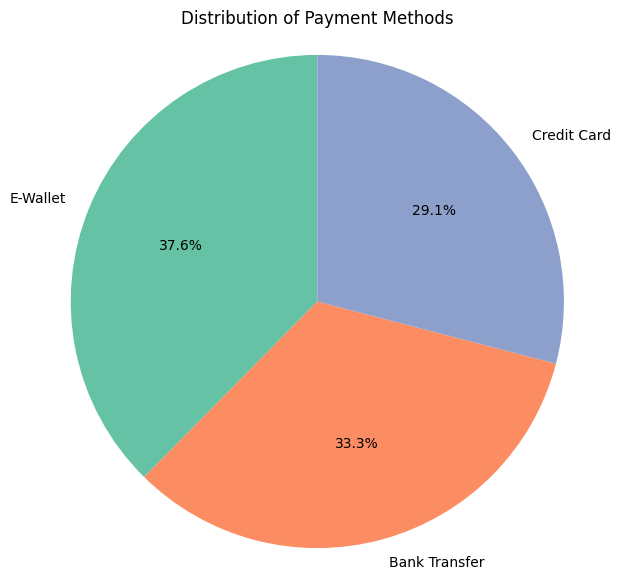

In [27]:
# 1. Pie chart showing the distribution of payment methods
plt.figure(figsize=(7, 7))
payment_method_counts = completed_data['Payment_Method'].value_counts()
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(payment_method_counts)))
plt.title("Distribution of Payment Methods")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

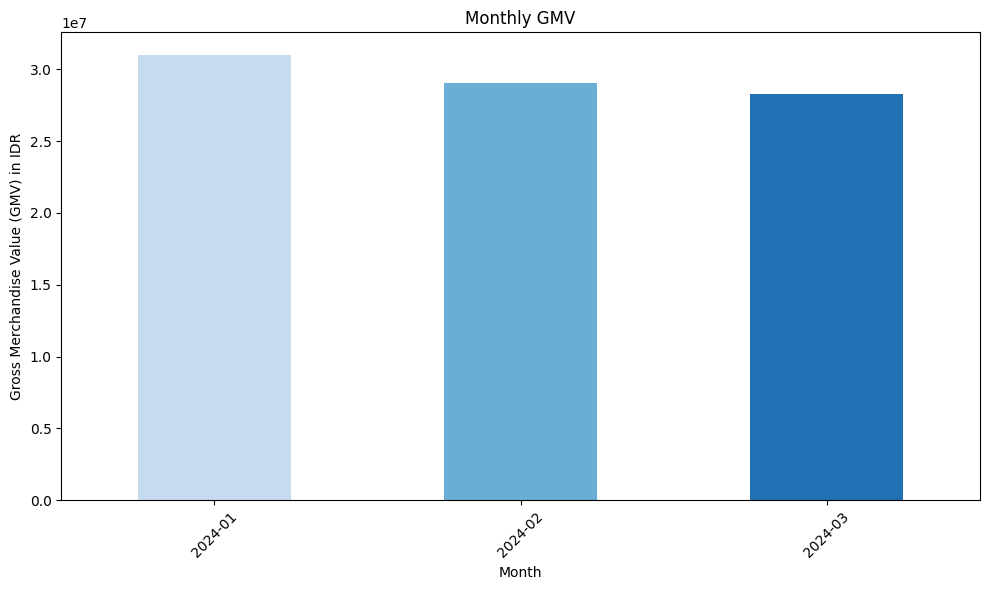

In [28]:
# 2. Bar chart displaying monthly GMV based on transaction dates
# Add a 'Month' column to group by month and year
completed_data['Month'] = completed_data['Date'].dt.to_period('M')

# Calculate GMV per month
monthly_gmv = completed_data.groupby('Month')['Total_Spent'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
monthly_gmv.plot(kind='bar', color=sns.color_palette("Blues", len(monthly_gmv)))
plt.title("Monthly GMV")
plt.xlabel("Month")
plt.ylabel("Gross Merchandise Value (GMV) in IDR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

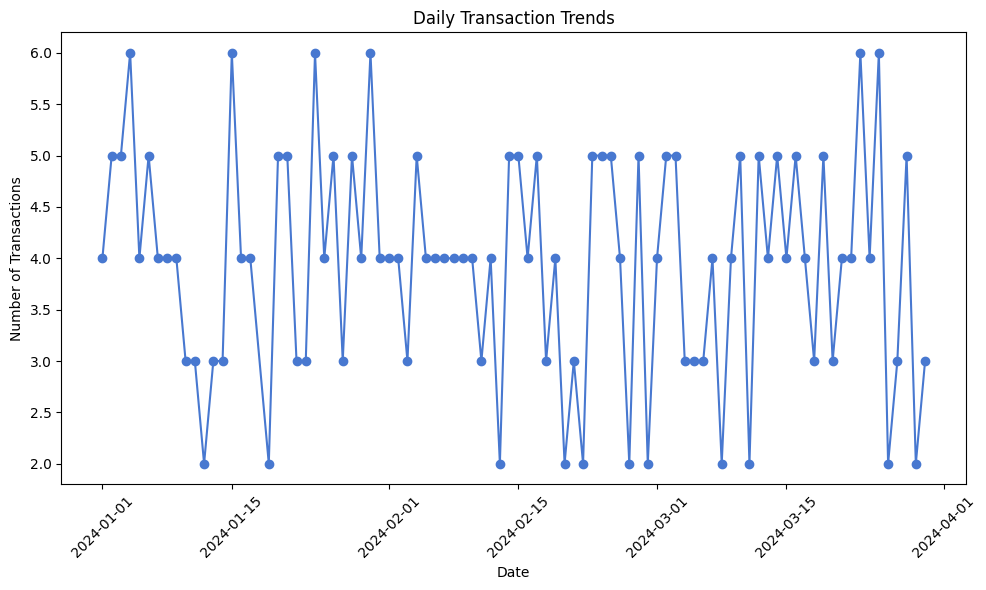

In [29]:
# 3. Line chart illustrating daily transaction trends
# Add a 'Day' column to group by day
completed_data['Day'] = completed_data['Date'].dt.date

# Count the number of transactions per day
daily_transactions = completed_data.groupby('Day')['Transaction_ID'].count()

# Plot the line chart
plt.figure(figsize=(10, 6))
daily_transactions.plot(kind='line', marker='o', color=sns.color_palette("muted")[0])
plt.title("Daily Transaction Trends")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()